# Medical Risk Project
## Presented by : Yarden Blizinski 

In [1]:
# === IMPORTS AND SETUP 

import time     
import os         
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.datasets import load_iris
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


## Initial Analysis

In [2]:
# === LOADING THE DATASET

def load_csv(file_name):
    df = pd.read_csv(file_name)
    return df


df = load_csv('train.csv')
pd.options.display.max_columns = None
df

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


### Exploring the dataset

After reviewing the dataset, we identified that it contains medical information. Each line in the file provides basic and health details about an individual. To analyze the medical data properly, we decided to thoroughly examine each feature and its values using reliable and well-known health sources.

Below is a breakdown of each feature in the dataset.

id: A person's serial number.

N_Days: Number of days under treatment.

Drug: Type of medicine given.

Age: Person's age in days.

Sex: Gender - male/female.

Ascites: Ascites is a buildup of fluid in your abdomen. It often occurs as a result of cirrhosis, a liver disease. 

Hepatomegaly: Enlarged Liver.
An enlarged liver is a symptom of underlying disease. It could be swollen with inflammation (hepatitis), with fat, or with cancer. It could be an acute response to infection or the result of advanced chronic liver disease.

Spiders: Spider Angioma.
Spider angiomas are a collection of blood vessels under the surface of your skin that resembles a spider. Angiomas are red to purple marks on your skin. Multiple angiomas could be a sign of an underlying condition.

Edema: Swelling caused by too much fluid trapped in the body's tissues. 

Bilirubin: Levels of bilirubin in blood. 
Bilirubin is a yellowish pigment that is made during the breakdown of red blood cells, it passes through the liver and is eventually excreted out of the body. Higher than usual levels of bilirubin may indicate different types of liver or bile duct problems. Sometimes, higher bilirubin levels may be caused by an increased rate of destruction of red blood cells.
Normal Values: 0.3 – 1.2 mg/dL.

Cholesterol: Cholesterol is a waxy substance found in your blood. Your body needs cholesterol to build healthy cells, but high levels of cholesterol can increase your risk of heart disease, clots , stroke and more.
Normal Values: < 200 mg/dL (For "total cholesterol" as in our database).

Albumin: Amount of albumin in blood. 
Albumin is a protein made by the liver, it keeps fluid from leaking out of the bloodstream and also carries hormones, vitamins, and enzymes throughout the body. Low albumin levels can be a sign of liver or kidney disease or another medical condition. 
Normal Values: 3.5 - 5.5 g/dL.

Copper: Copper is a mineral that your body uses for many important processes, including making energy, blood vessels, and melanin (the substance that gives your skin and eyes their color). Copper helps your body use iron, and it supports brain development. Many health problems can disrupt normal copper levels. This can cause you to have too little copper (copper deficiency) or too much copper (copper toxicity). Measuring the copper level is also required to diagnose people with Wilson disease that often develops symptoms of hepatitis (inflammation of the liver) and can have an abrupt decrease in liver function (acute liver failure).
Normal Values: total copper in the blood is 62 - 140 mcg/dL.

Alk_Phos: An alkaline phosphatase (ALP) test measures the amount of ALP in your blood. ALP is an enzyme found in many parts of your body. Each part of your body produces a different type of ALP. Most ALP is found in your liver, bones, kidneys, and digestive system. Abnormal levels of ALP in your blood may be a sign of a wide range of health conditions, including liver disease, bone disorders, and chronic kidney disease. 
Normal Values: 30 - 120 IU/L (501 to 2004 (µg/L)).

SGOT: AST (Other names: SGOT) is an enzyme that is found mostly in the liver, but it's also in muscles and other organs in your body. When cells that contain AST are damaged, they release the AST into your blood. An AST blood test measures the amount of AST in your blood. The test is commonly used to help diagnose liver damage or disease. An elevated AST level may be a sign of a liver condition
Normal Values: 8 - 33 U/L

Tryglicerides: Triglycerides are a very common kind of fat in your body. They’re in butter and other fats in food. You also make triglycerides from extra calories to use later. But high triglyceride levels can raise your risk of issues like heart attacks and strokes.
Normal Values: < 150 mg/dL.

Platelets: Platelets, also called thrombocytes, are tiny components of your blood that help with clotting. Platelets are your body’s natural bandage to stop bleeding.  Low platelet count (Thrombocytopenia) can lead to bruising and excessive bleeding. High platelet count (Thrombocytosis) can lead to abnormal blood clotting. Low platelet count (Thrombocytopenia) can lead to bruising and excessive bleeding. High platelet count (Thrombocytosis) can lead to abnormal blood clotting.
Normal Values: 150 - 450 G/L.

Prothrombin:The prothrombin time test is a test to evaluate blood clotting. Prothrombin is a protein produced by your liver. It is one of many factors in your blood that help it to clot appropriately. Blood that clots too slowly can be caused by: Blood-thinning medicines, Liver problems and more. 
Normal Values: 10-13 sec

Stage: The stage of the disease on a scale of 1-4 where 4 is the most severe condition.

Status: Supposedly survived or not.


Medical terms were taken from - https://my.clevelandclinic.org/, https://www.mayoclinic.org/, https://medlineplus.gov/.

# Data Handling

In [3]:
# Prints DataFrame info: index dtype, columns, non-null values, and memory usage, to plan the handling phase.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [4]:
# Check for missing values.

df.isna().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [5]:
# Check for duplicates.

df.duplicated().sum()

0

In [6]:
# Converting the age measurement from days to years for easier handling.

def age_convert_days_to_years(df):
    df_handling = df.copy()
    df_handling['Age'] = df['Age'] / 365
    return df_handling
    
    
df = age_convert_days_to_years(df)
df['Age']

0       58.991781
1       52.704110
2       37.608219
3       50.575342
4       45.638356
          ...    
7900    46.134247
7901    46.660274
7902    70.884932
7903    62.904110
7904    52.704110
Name: Age, Length: 7905, dtype: float64

In [7]:
# Converting values of blood components by normal ranges.

normal_blood_components_ranges = {
    
    'Bilirubin': (0.3, 1.2),  
    'Cholesterol': (0.0, 200.0), 
    'Albumin': (3.5, 5.5), 
    'Copper': (62.0, 140.0), 
    'Alk_Phos': (501.0, 2004.0), 
    'SGOT': (8.0, 33.0), 
    'Tryglicerides': (0.0, 150.0), 
    'Platelets': (150.0, 450.0), 
    'Prothrombin': (10.0, 13.0)    
} 


def convert_by_range(df, ranges):
    df_copy = df.copy()
    for col, (low, high) in ranges.items():
        df_copy[col] = df_copy[col].apply(lambda x: 'low' if x < low else ('high' if x > high else 'normal'))
    return df_copy

# categorize_values
df_blood_components_range_convert = convert_by_range(df, normal_blood_components_ranges)
df_blood_components_range_convert

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,58.991781,M,N,N,N,N,high,high,low,high,normal,high,normal,normal,low,3.0,D
1,1,2574,Placebo,52.704110,F,N,N,N,N,normal,high,normal,normal,normal,high,normal,normal,normal,3.0,C
2,2,3428,Placebo,37.608219,F,N,Y,Y,Y,high,high,normal,normal,normal,high,normal,normal,normal,4.0,D
3,3,2576,Placebo,50.575342,F,N,N,N,N,normal,high,normal,low,normal,high,normal,normal,normal,3.0,C
4,4,788,Placebo,45.638356,F,N,Y,N,N,normal,high,normal,normal,normal,high,normal,normal,normal,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,46.134247,F,N,N,N,N,normal,high,normal,low,normal,high,high,normal,low,2.0,C
7901,7901,1492,Placebo,46.660274,F,N,Y,N,N,normal,high,low,normal,normal,high,normal,normal,normal,4.0,C
7902,7902,1576,D-penicillamine,70.884932,F,N,N,Y,S,high,high,low,low,normal,high,normal,normal,normal,2.0,D
7903,7903,3584,D-penicillamine,62.904110,M,N,Y,N,N,normal,high,low,low,normal,high,normal,normal,normal,4.0,D


In [8]:
# Display the value counts for each column to identify which ones should be converted to categorical data.

def unique_count(df):
    for col in df:
        unique_count = len(df[col].unique())
        print(f"Number of possible values for column '{col}':")
        print(f"{unique_count}")
        
        
unique_count(df_blood_components_range_convert)

Number of possible values for column 'id':
7905
Number of possible values for column 'N_Days':
461
Number of possible values for column 'Drug':
2
Number of possible values for column 'Age':
391
Number of possible values for column 'Sex':
2
Number of possible values for column 'Ascites':
2
Number of possible values for column 'Hepatomegaly':
2
Number of possible values for column 'Spiders':
2
Number of possible values for column 'Edema':
3
Number of possible values for column 'Bilirubin':
2
Number of possible values for column 'Cholesterol':
2
Number of possible values for column 'Albumin':
2
Number of possible values for column 'Copper':
3
Number of possible values for column 'Alk_Phos':
3
Number of possible values for column 'SGOT':
2
Number of possible values for column 'Tryglicerides':
2
Number of possible values for column 'Platelets':
3
Number of possible values for column 'Prothrombin':
3
Number of possible values for column 'Stage':
4
Number of possible values for column 'Status

In [9]:
# Convert columns to dummy or change the variable types to categorical if needed by checking if the number of unique values is less than or equal to the specified threshold.
# Convert categorical columns to dummy variables if "return_dummies" is True.

def categorical_and_dummies_convert(df, max_uniques=4, return_dummies=True):
    df_handling = df.copy()
    for col in df_handling.columns:
        # Skip columns that are already categorical or dummy variables if needed.
        if pd.api.types.is_categorical_dtype(df_handling[col]) or col.startswith(tuple(df_handling.select_dtypes(include=['uint8']).columns)):
            continue
        if df_handling[col].nunique() <= max_uniques:
            df_handling[col] = df_handling[col].astype('category')
    
    if return_dummies:
        df_with_dummies = pd.get_dummies(df_handling)
        return df_with_dummies
    else:
        return df_handling
    
    
# DataFrame after adding of dummies columns.
df_dum = categorical_and_dummies_convert(df_blood_components_range_convert)
print(df_dum.columns,'\n')
display(df_dum)

# DataFrame after adding dummy columns except for the status column.
last_col = df_blood_components_range_convert.iloc[:, -1]
df_excluded_last = df_blood_components_range_convert.iloc[:, :-1]
df_transformed = categorical_and_dummies_convert(df_excluded_last)
df_transformed[last_col.name] = last_col
#display(df_transformed)

Index(['id', 'N_Days', 'Age', 'Drug_D-penicillamine', 'Drug_Placebo', 'Sex_F',
       'Sex_M', 'Ascites_N', 'Ascites_Y', 'Hepatomegaly_N', 'Hepatomegaly_Y',
       'Spiders_N', 'Spiders_Y', 'Edema_N', 'Edema_S', 'Edema_Y',
       'Bilirubin_high', 'Bilirubin_normal', 'Cholesterol_high',
       'Cholesterol_normal', 'Albumin_low', 'Albumin_normal', 'Copper_high',
       'Copper_low', 'Copper_normal', 'Alk_Phos_high', 'Alk_Phos_low',
       'Alk_Phos_normal', 'SGOT_high', 'SGOT_normal', 'Tryglicerides_high',
       'Tryglicerides_normal', 'Platelets_high', 'Platelets_low',
       'Platelets_normal', 'Prothrombin_high', 'Prothrombin_low',
       'Prothrombin_normal', 'Stage_1.0', 'Stage_2.0', 'Stage_3.0',
       'Stage_4.0', 'Status_C', 'Status_CL', 'Status_D'],
      dtype='object') 



,id,N_Days,Age,Drug_D-penicillamine,Drug_Placebo,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Bilirubin_high,Bilirubin_normal,Cholesterol_high,Cholesterol_normal,Albumin_low,Albumin_normal,Copper_high,Copper_low,Copper_normal,Alk_Phos_high,Alk_Phos_low,Alk_Phos_normal,SGOT_high,SGOT_normal,Tryglicerides_high,Tryglicerides_normal,Platelets_high,Platelets_low,Platelets_normal,Prothrombin_high,Prothrombin_low,Prothrombin_normal,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0,Status_C,Status_CL,Status_D
0,0,999,58.991781,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
1,1,2574,52.704110,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
2,2,3428,37.608219,0,1,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
3,3,2576,50.575342,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
4,4,788,45.638356,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,46.134247,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
7901,7901,1492,46.660274,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0
7902,7902,1576,70.884932,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7903,7903,3584,62.904110,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1


In [10]:
# Displays all values and their frequency for each categorical column.

def show_categorical_uniques(df):
    for column in df.columns:
        if df[column].dtype == 'category':
            print(f"Value counts for column '{column}':")
            print(df[column].value_counts())
            print("\n" + "-"*50 + "\n")

            
# DataFrame after conversion to categorical variables.            
df_cat = categorical_and_dummies_convert(df_blood_components_range_convert,return_dummies = False) 
show_categorical_uniques(df_cat)          

Value counts for column 'Drug':
Placebo            4010
D-penicillamine    3895
Name: Drug, dtype: int64

--------------------------------------------------

Value counts for column 'Sex':
F    7336
M     569
Name: Sex, dtype: int64

--------------------------------------------------

Value counts for column 'Ascites':
N    7525
Y     380
Name: Ascites, dtype: int64

--------------------------------------------------

Value counts for column 'Hepatomegaly':
Y    4042
N    3863
Name: Hepatomegaly, dtype: int64

--------------------------------------------------

Value counts for column 'Spiders':
N    5966
Y    1939
Name: Spiders, dtype: int64

--------------------------------------------------

Value counts for column 'Edema':
N    7161
S     399
Y     345
Name: Edema, dtype: int64

--------------------------------------------------

Value counts for column 'Bilirubin':
normal    4406
high      3499
Name: Bilirubin, dtype: int64

--------------------------------------------------

Valu

In [11]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7905 non-null   int64  
 1   N_Days                7905 non-null   int64  
 2   Age                   7905 non-null   float64
 3   Drug_D-penicillamine  7905 non-null   uint8  
 4   Drug_Placebo          7905 non-null   uint8  
 5   Sex_F                 7905 non-null   uint8  
 6   Sex_M                 7905 non-null   uint8  
 7   Ascites_N             7905 non-null   uint8  
 8   Ascites_Y             7905 non-null   uint8  
 9   Hepatomegaly_N        7905 non-null   uint8  
 10  Hepatomegaly_Y        7905 non-null   uint8  
 11  Spiders_N             7905 non-null   uint8  
 12  Spiders_Y             7905 non-null   uint8  
 13  Edema_N               7905 non-null   uint8  
 14  Edema_S               7905 non-null   uint8  
 15  Edema_Y              

# EDA

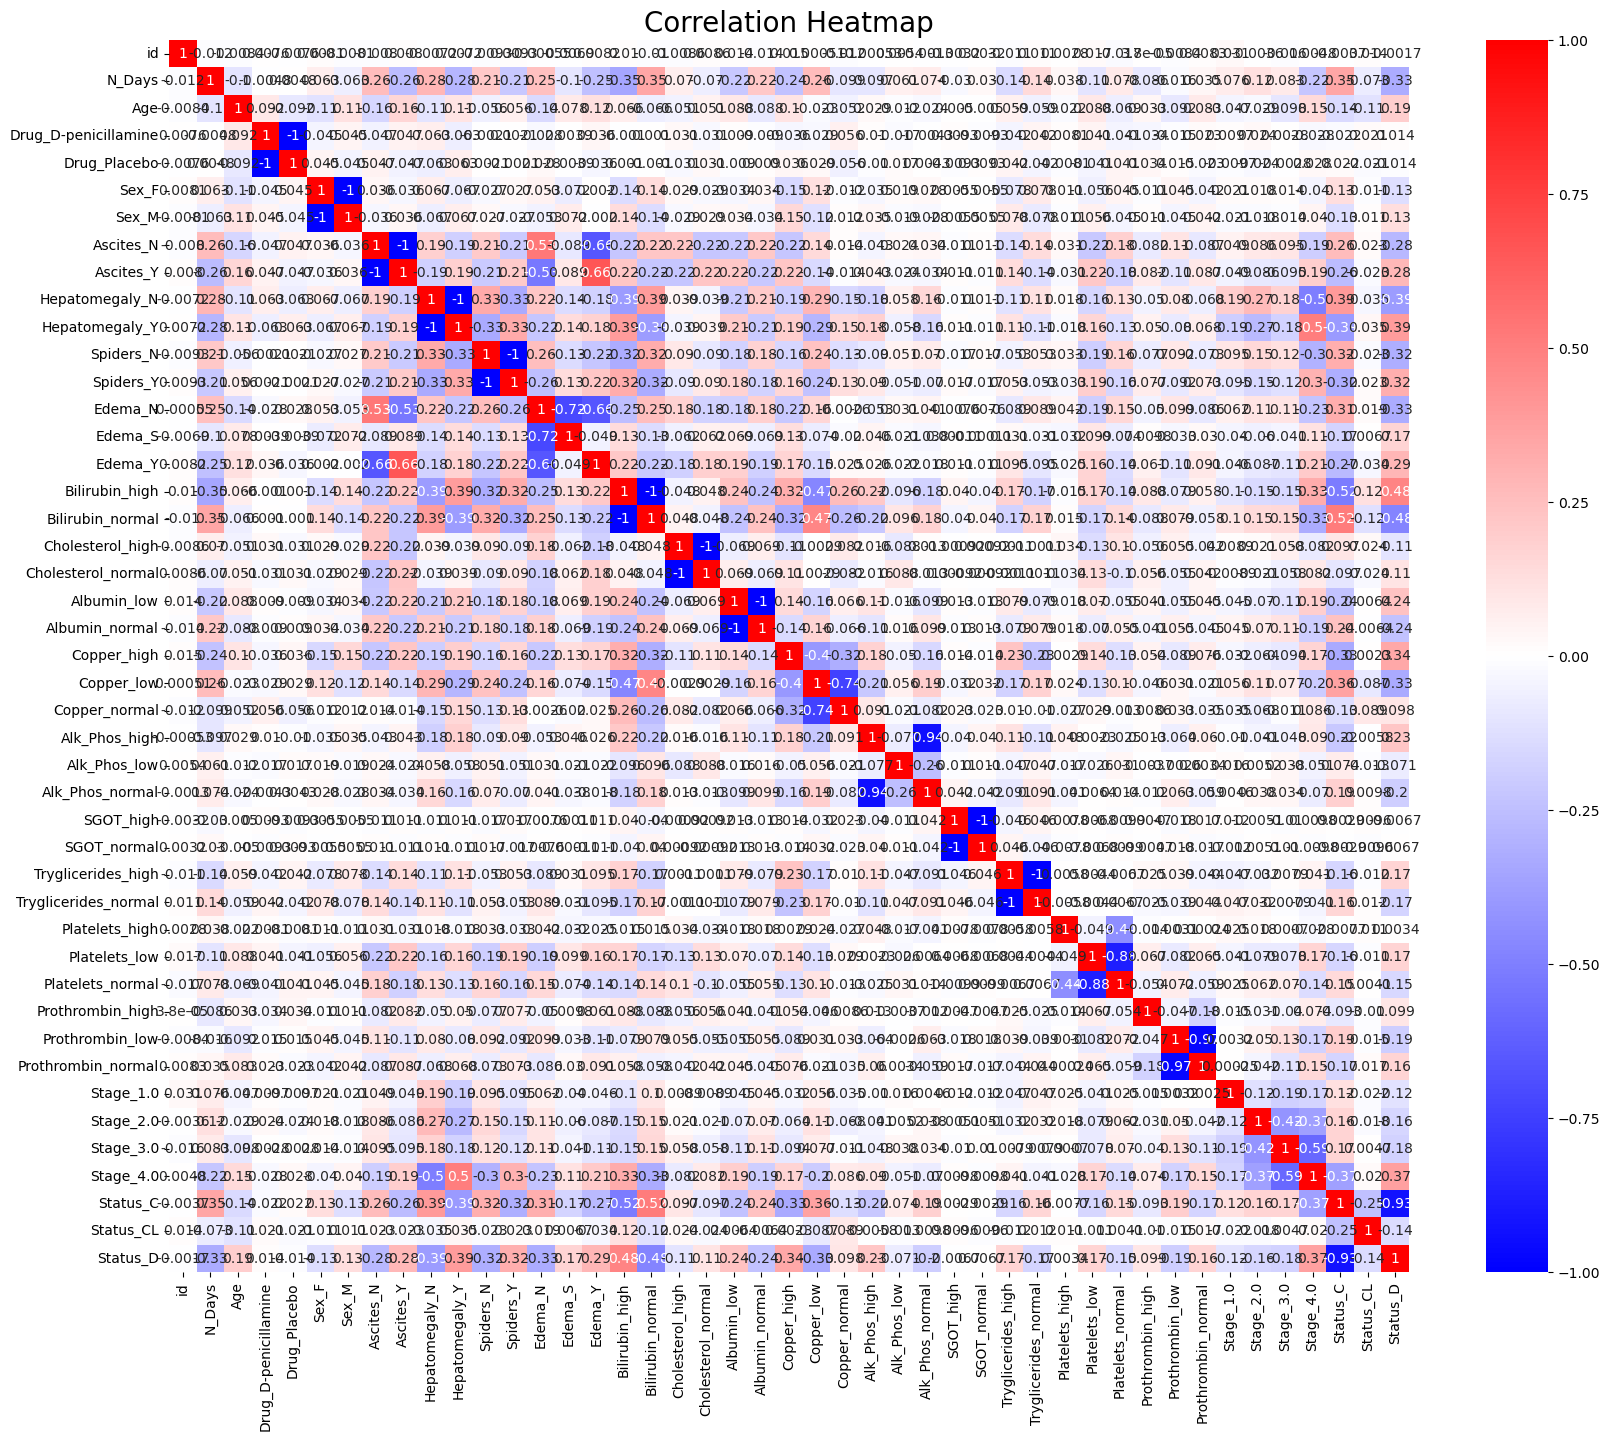

In [12]:
# Illustrates strong correlations.

def correlation_Heatmap(df):
    plt.subplots(figsize=(20,16))
    sns.heatmap(df.corr(),cmap='bwr', annot=True)
    plt.title('Correlation Heatmap', fontsize = 20) 
    

correlation_Heatmap(df_dum)

In [13]:
def sort_correlations(df):
    df_corr = df.corr()
    sorted_correlations = {}
    for column in df_corr.columns:
        sorted_col = df_corr[column].sort_values(ascending=False)
        sorted_col = sorted_col.iloc[1:]
        sorted_correlations[column] = [f"{index} ({value})" for index, value in sorted_col.items()]
    sorted_correlations_df = pd.DataFrame(sorted_correlations)
    return sorted_correlations_df

sort_corr_df_dum = sort_correlations(df_dum)
sort_corr_df_dum

,id,N_Days,Age,Drug_D-penicillamine,Drug_Placebo,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Bilirubin_high,Bilirubin_normal,Cholesterol_high,Cholesterol_normal,Albumin_low,Albumin_normal,Copper_high,Copper_low,Copper_normal,Alk_Phos_high,Alk_Phos_low,Alk_Phos_normal,SGOT_high,SGOT_normal,Tryglicerides_high,Tryglicerides_normal,Platelets_high,Platelets_low,Platelets_normal,Prothrombin_high,Prothrombin_low,Prothrombin_normal,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0,Status_C,Status_CL,Status_D
0,Stage_1.0 (0.03123624818931356),Bilirubin_normal (0.34951627578220446),Status_D (0.1884949301941177),Age (0.09206850695729338),Hepatomegaly_Y (0.0630710357768641),Bilirubin_normal (0.13514343104079946),Copper_high (0.15223813688826748),Edema_N (0.527047449601577),Edema_Y (0.658273776178422),Status_C (0.39151037915053505),Stage_4.0 (0.503033975467503),Hepatomegaly_N (0.3297028260427969),Hepatomegaly_Y (0.3297028260427968),Ascites_N (0.527047449601577),Status_D (0.16927859338178297),Ascites_Y (0.658273776178422),Status_D (0.4797031526157397),Status_C (0.5151859960400111),Ascites_N (0.22062047538166402),Ascites_Y (0.22062047538166382),Status_D (0.23919478840191388),Bilirubin_normal (0.2371826366421732),Status_D (0.3369043051828918),Bilirubin_normal (0.4745955413303195),Bilirubin_high (0.2586320317269893),Status_D (0.22554818489465808),Bilirubin_normal (0.09603793480053062),Copper_low (0.18904812470260626),Tryglicerides_normal (0.04649639723238985),Tryglicerides_high (0.04649639723239),Copper_high (0.22790719200635612),Bilirubin_normal (0.17221576841801042),Alk_Phos_high (0.04800767156081378),Ascites_Y (0.21721258082919595),Ascites_N (0.18054703828530452),Status_D (0.09874100313049283),Status_C (0.19059927064710827),Status_D (0.1641222440340189),Hepatomegaly_N (0.19002646670080278),Hepatomegaly_N (0.26932886288601116),Hepatomegaly_N (0.17892286652670117),Hepatomegaly_Y (0.503033975467503),Bilirubin_normal (0.5151859960400111),Bilirubin_high (0.1213042176764192),Bilirubin_high (0.4797031526157397)
1,Platelets_low (0.017283392689424897),Status_C (0.34722847755660735),Ascites_Y (0.15641191530226517),Hepatomegaly_N (0.06307103577686396),Ascites_N (0.0470350676480013),Status_C (0.12899781393778187),Bilirubin_high (0.13514343104079934),Status_C (0.2614391313704857),Status_D (0.27632552517186054),Bilirubin_normal (0.3851257790552502),Status_D (0.3866882441396467),Bilirubin_normal (0.3212679252602047),Bilirubin_high (0.321267925260205),Status_C (0.3131025105193879),Hepatomegaly_Y (0.13638555939577923),Status_D (0.28644912347255297),Hepatomegaly_Y (0.3851257790552501),Copper_low (0.4745955413303195),Edema_N (0.1755884315635059),Edema_Y (0.18420201146000703),Bilirubin_high (0.23718263664217376),Status_C (0.23638925135856317),Bilirubin_high (0.3165235051302521),Status_C (0.36003136063624325),Hepatomegaly_Y (0.15338184061876228),Bilirubin_high (0.21628513803329075),Cholesterol_normal (0.08818486735957115),Status_C (0.18730625227254658),Alk_Phos_normal (0.04241198457231405),Alk_Phos_high (0.0401468240818598),Bilirubin_high (0.17221576841801026),Copper_low (0.1719919010656741),Edema_N (0.041620590258127504),Spiders_Y (0.19176853138948),Spiders_N (0.15689951485286974),Bilirubin_high (0.08797992727882457),Stage_3.0 (0.1256319531576159),Stage_4.0 (0.15456301665523833),Status_C (0.12182101914407589),Status_C (0.16441845575404446),Status_C (0.16979347734848202),Status_D (0.37274454678057395),Hepatomegaly_N (0.39151037915053505),Copper_normal (0.0888618703198913),Hepatomegaly_Y (0.3866882441396467)
2,Copper_high (0.014959986144587139),Hepatomegaly_N (0.2847796334400513),Stage_4.0 (0.1478884359554604),Copper_normal (0.056225991463606656),Sex_F (0.04468118920759681),Copper_low (0.12015322465129787),Status_D (0.1275324388770552),N_Days (0.25893574875278963),Bilirubin_high (0.222402554994085),Spiders_N (0.3297028260427969),Bilirubin_high (0.3851257790552501),Status_C (0.31928349878770246),Status_D (0.3173

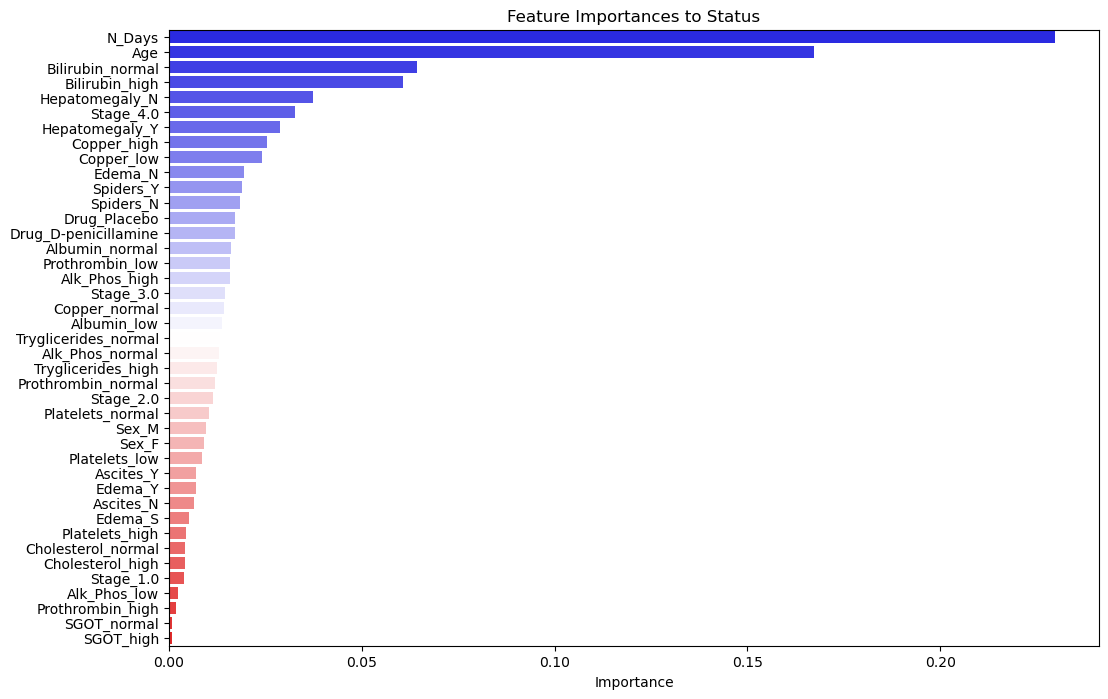

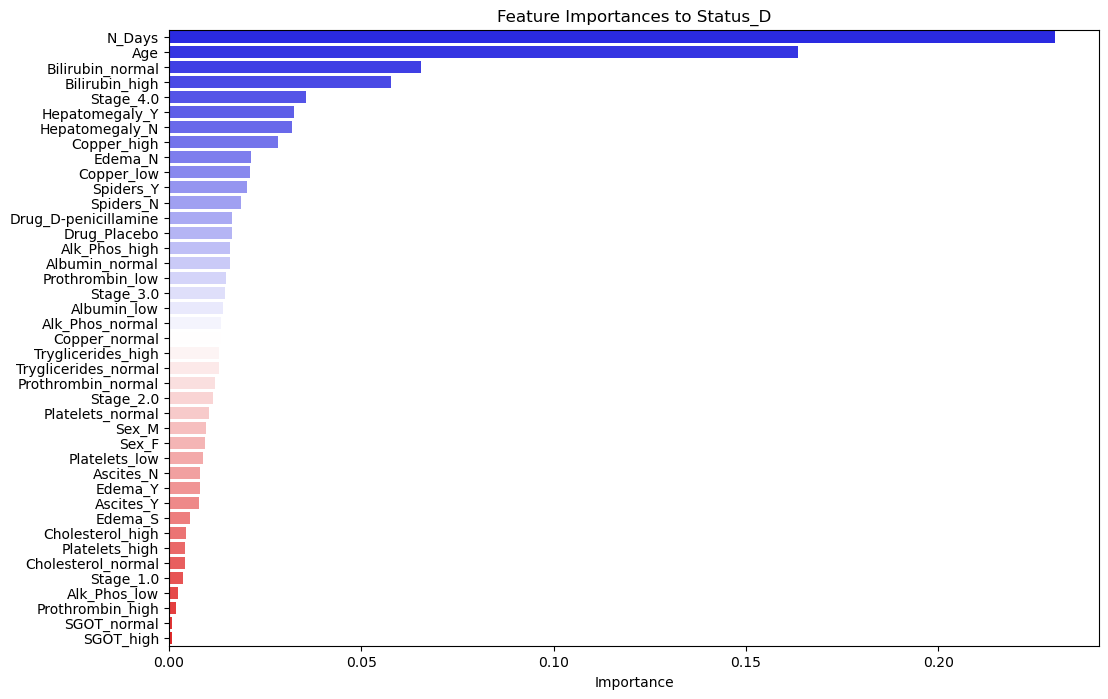

In [14]:
def feature_importances(df, to_predict, to_drop = None):
    if to_drop is None:
        to_drop = [to_predict]
    y=df[to_predict]
    X=df.drop(columns=to_drop,axis=1)
    
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X, y)

    feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=feature_importances['Importance'], y=feature_importances.index,palette = 'bwr')
    plt.title(f'Feature Importances to {to_predict}')
    plt.show()
    
#    last_features = feature_importances.index[-15:].tolist()

#    return last_features

    
# All statuses
to_drop_all_statuses = feature_importances(df_transformed.copy(),"Status", ["Status","id"])

# Only Status_D
to_drop_status_D = feature_importances(df_dum.copy(),"Status_D", ["Status_D","Status_C","Status_CL","id"])

#print(to_drop_all_statuses)
#print(to_drop_status_D)

# Machine Learning



Model Random Forest has a score of 0.8184693232131562.
Confusion matrix:



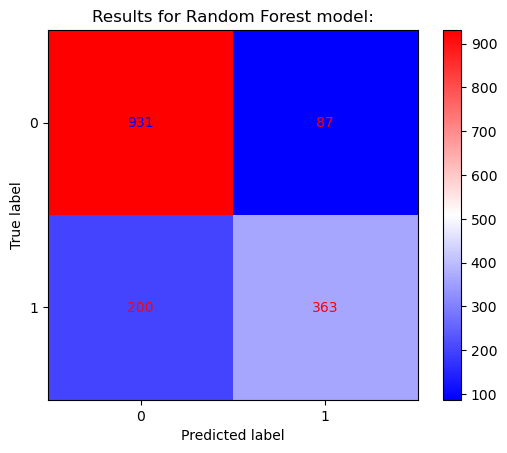



               precision    recall  f1-score   support

           0       0.82      0.91      0.87      1018
           1       0.81      0.64      0.72       563

    accuracy                           0.82      1581
   macro avg       0.81      0.78      0.79      1581
weighted avg       0.82      0.82      0.81      1581



Model Logistic Regression has a score of 0.8153067678684377.
Confusion matrix:



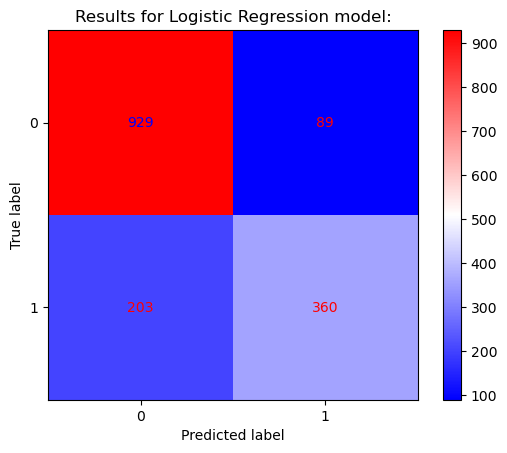



               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1018
           1       0.80      0.64      0.71       563

    accuracy                           0.82      1581
   macro avg       0.81      0.78      0.79      1581
weighted avg       0.81      0.82      0.81      1581



Model Decision Tree has a score of 0.7463630613535737.
Confusion matrix:



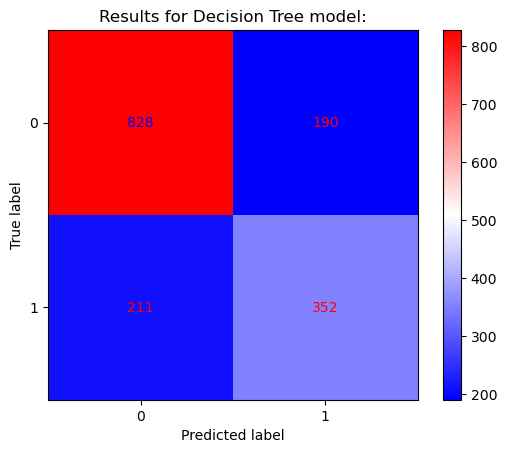



               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1018
           1       0.65      0.63      0.64       563

    accuracy                           0.75      1581
   macro avg       0.72      0.72      0.72      1581
weighted avg       0.74      0.75      0.75      1581



Model Naive Base has a score of 0.6192283364958887.
Confusion matrix:



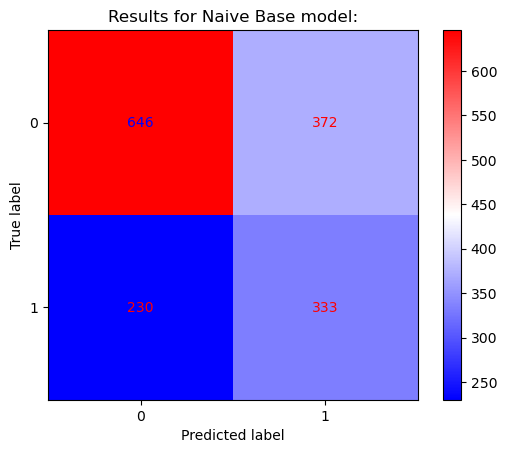



               precision    recall  f1-score   support

           0       0.74      0.63      0.68      1018
           1       0.47      0.59      0.53       563

    accuracy                           0.62      1581
   macro avg       0.60      0.61      0.60      1581
weighted avg       0.64      0.62      0.63      1581



,Model,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.818469,0.817290,0.818469,0.813117
1,Logistic Regression,0.815307,0.813945,0.815307,0.809801
2,Decision Tree,0.746363,0.744404,0.746363,0.745248
3,Naive Base,0.619228,0.643039,0.619228,0.626275




Model Random Forest has a score of 0.799493991144845.
Confusion matrix:



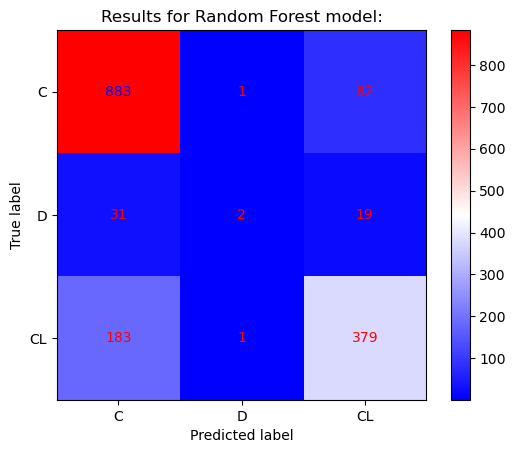



               precision    recall  f1-score   support

           C       0.80      0.91      0.86       966
          CL       0.50      0.04      0.07        52
           D       0.79      0.67      0.73       563

    accuracy                           0.80      1581
   macro avg       0.70      0.54      0.55      1581
weighted avg       0.79      0.80      0.78      1581



Model Logistic Regression has a score of 0.7950664136622391.
Confusion matrix:



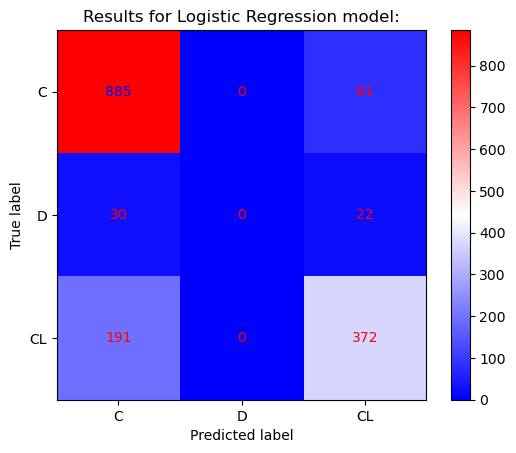



               precision    recall  f1-score   support

           C       0.80      0.92      0.85       966
          CL       0.00      0.00      0.00        52
           D       0.78      0.66      0.72       563

    accuracy                           0.80      1581
   macro avg       0.53      0.53      0.52      1581
weighted avg       0.77      0.80      0.78      1581



Model Decision Tree has a score of 0.7179000632511069.
Confusion matrix:



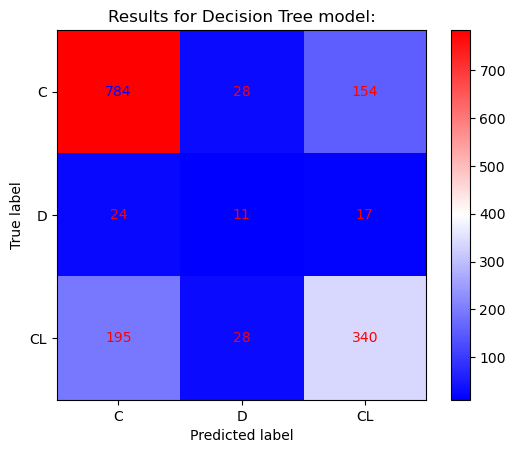



               precision    recall  f1-score   support

           C       0.78      0.81      0.80       966
          CL       0.16      0.21      0.18        52
           D       0.67      0.60      0.63       563

    accuracy                           0.72      1581
   macro avg       0.54      0.54      0.54      1581
weighted avg       0.72      0.72      0.72      1581



Model Naive Base has a score of 0.47881087919038584.
Confusion matrix:



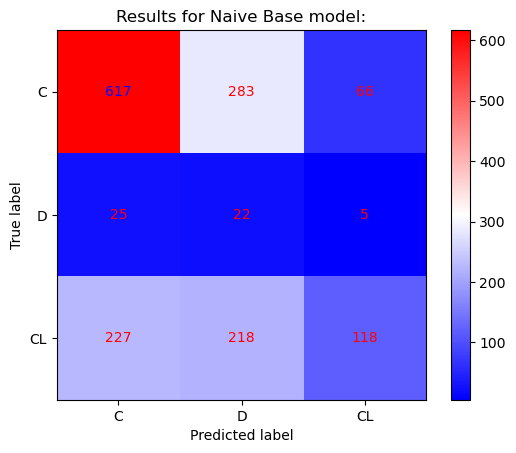



               precision    recall  f1-score   support

           C       0.71      0.64      0.67       966
          CL       0.04      0.42      0.08        52
           D       0.62      0.21      0.31       563

    accuracy                           0.48      1581
   macro avg       0.46      0.42      0.35      1581
weighted avg       0.66      0.48      0.53      1581



,Model,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.799494,0.789431,0.799494,0.784190
1,Logistic Regression,0.795066,0.767800,0.795066,0.777192
2,Decision Tree,0.717900,0.719934,0.717900,0.718117
3,Naive Base,0.478811,0.657534,0.478811,0.525162


In [18]:
ML_models = {
    
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Base' : MultinomialNB(),
}

            
def evaluate_ML_models(df, models, to_predict, to_drop=None):
    to_drop = [to_predict] if to_drop is None else to_drop
    X, y = df.drop(columns=to_drop), df[to_predict]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    results = []
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        scores = {
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
            'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
            'F1-score': f1_score(y_test, y_pred, average='weighted', zero_division=0)
        }

        results.append(scores)
        
        print(f"\n\nModel {name} has a score of {scores['Accuracy']}.\nConfusion matrix:\n")
        cm = confusion_matrix(y_test, y_pred)
        ConfusionMatrixDisplay(cm, display_labels=y_test.unique()).plot(cmap='bwr')
        plt.title(f'Results for {name} model:')
        plt.show()
        print("\n\n", classification_report(y_test, y_pred, zero_division=0))

    return pd.DataFrame(results)


# Only Status_D        
ML_models_result_only_D = evaluate_ML_models(df_dum.copy(), ML_models, "Status_D", ["Status_D","Status_C", "Status_CL"] )
display(ML_models_result_only_D)


# All statuses
ML_models_result_all_statuses = evaluate_ML_models(df_transformed.copy(), ML_models, "Status")
display(ML_models_result_all_statuses)



# Results

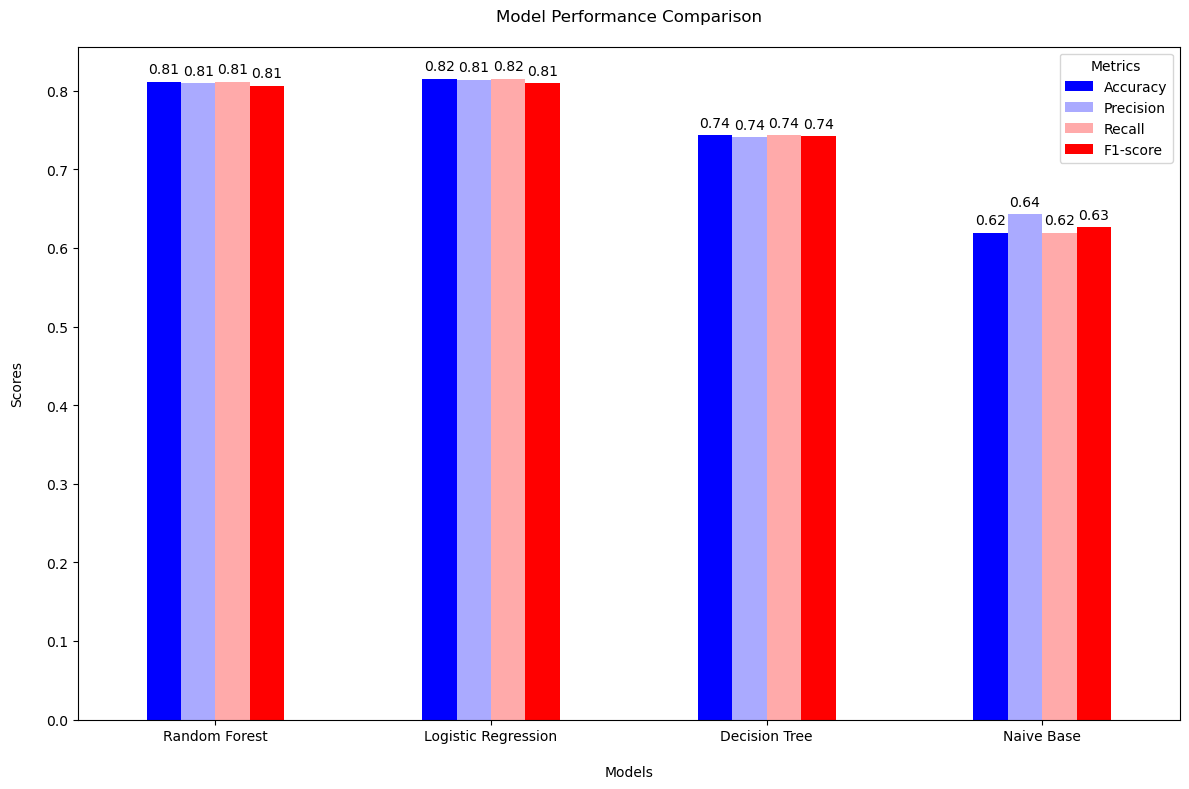

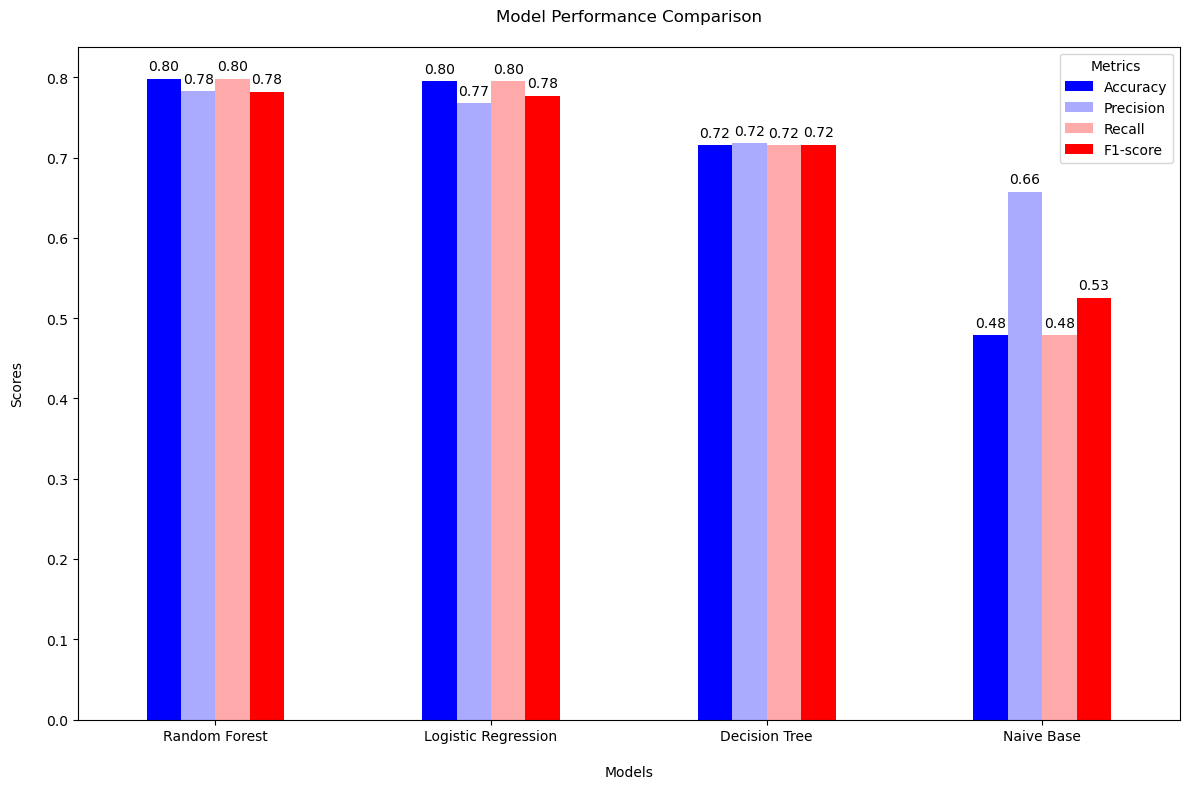

In [16]:
def plot_model_results(results):
    results.set_index('Model', inplace=True)
    ax = results.plot(kind='bar', figsize=(12, 8),cmap='bwr')

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), textcoords='offset points')

    plt.title('Model Performance Comparison\n')
    plt.xlabel('\nModels')
    plt.ylabel('Scores\n')
    plt.xticks(rotation=0)
    plt.legend(title='Metrics')
    plt.tight_layout()
    plt.show()
    

# Only Status_D       
plot_model_results(ML_models_result_only_D) 
      
# All statuses
plot_model_results(ML_models_result_all_statuses)  
